In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from pycaret.regression import *
from pycaret.classification import *
import pickle
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR

# Задание 1

## Загрузка преобработанного датасета(классификации)

In [84]:
data=pd.read_csv('classification.csv')
data

,Unnamed: 0,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...
88535,90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
88536,90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
88537,90833,0.035039,0.078350,116288.999548,5.471396e+07,24.40,0
88538,90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


In [85]:
X = data.drop(['hazardous'], axis=1)
y= data['hazardous']
X.head()

,Unnamed: 0,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0,0.016016,0.035813,56014.078517,1.024333e+06,26.1
1,1,0.030518,0.068240,7864.348060,3.268186e+07,24.7
2,2,0.055533,0.124177,55257.544508,6.538636e+07,23.4
3,3,0.019256,0.043057,41531.404722,1.260796e+07,25.7
4,4,0.139494,0.311918,67639.394481,7.130590e+07,21.4


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Decision Tree Classification¶

In [87]:
parameters = {'max_depth': np.arange(1, 10, 1)}
optimal = RandomizedSearchCV(DecisionTreeClassifier(), parameters).fit(X_train, y_train)
optimal.best_params_['max_depth']

3

In [88]:
TreeCls = DecisionTreeClassifier(max_depth=optimal.best_params_['max_depth'])

In [89]:
TreeCls.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [90]:
y_pred_cls = TreeCls.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_cls)))

Model accuracy score: 0.9117


In [91]:
print('Training score: {:.4f}'.format(TreeCls.score(X_train, y_train)))
print('Test score: {:.4f}'.format(TreeCls.score(X_test, y_test)))

Training score: 0.9131
Test score: 0.9117


т.к. разница не суественна, можно сказать что переобучения модели нет

In [92]:
from sklearn import tree

text_representation = tree.export_text(TreeCls)
print(text_representation)

|--- feature_2 <= 0.23
|   |--- feature_1 <= 0.10
|   |   |--- feature_5 <= 22.30
|   |   |   |--- class: 0
|   |   |--- feature_5 >  22.30
|   |   |   |--- class: 0
|   |--- feature_1 >  0.10
|   |   |--- feature_2 <= 0.22
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.22
|   |   |   |--- class: 0
|--- feature_2 >  0.23
|   |--- feature_4 <= 11371198.00
|   |   |--- feature_4 <= 7682901.25
|   |   |   |--- class: 1
|   |   |--- feature_4 >  7682901.25
|   |   |   |--- class: 1
|   |--- feature_4 >  11371198.00
|   |   |--- feature_3 <= 20945.57
|   |   |   |--- class: 0
|   |   |--- feature_3 >  20945.57
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'x[5] <= 22.055\ngini = 0.175\nsamples = 70832\nvalue = [63955, 6877]'),
 Text(0.25, 0.625, 'x[4] <= 11371198.0\ngini = 0.42\nsamples = 22783\nvalue = [15953, 6830]'),
 Text(0.125, 0.375, 'x[4] <= 7682901.25\ngini = 0.267\nsamples = 1046\nvalue = [166, 880]'),
 Text(0.0625, 0.125, 'gini = 0.071\nsamples = 515\nvalue = [19, 496]'),
 Text(0.1875, 0.125, 'gini = 0.4\nsamples = 531\nvalue = [147, 384]'),
 Text(0.375, 0.375, 'x[3] <= 20945.574\ngini = 0.398\nsamples = 21737\nvalue = [15787, 5950]'),
 Text(0.3125, 0.125, 'gini = 0.136\nsamples = 1413\nvalue = [1309, 104]'),
 Text(0.4375, 0.125, 'gini = 0.41\nsamples = 20324\nvalue = [14478, 5846]'),
 Text(0.75, 0.625, 'x[2] <= 0.22\ngini = 0.002\nsamples = 48049\nvalue = [48002, 47]'),
 Text(0.625, 0.375, 'x[5] <= 22.305\ngini = 0.0\nsamples = 47317\nvalue = [47306, 11]'),
 Text(0.5625, 0.125, 'gini = 0.012\nsamples = 1442\nvalue = [1433, 9]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 45875\nvalue = [45873, 2]'),
 Text(0

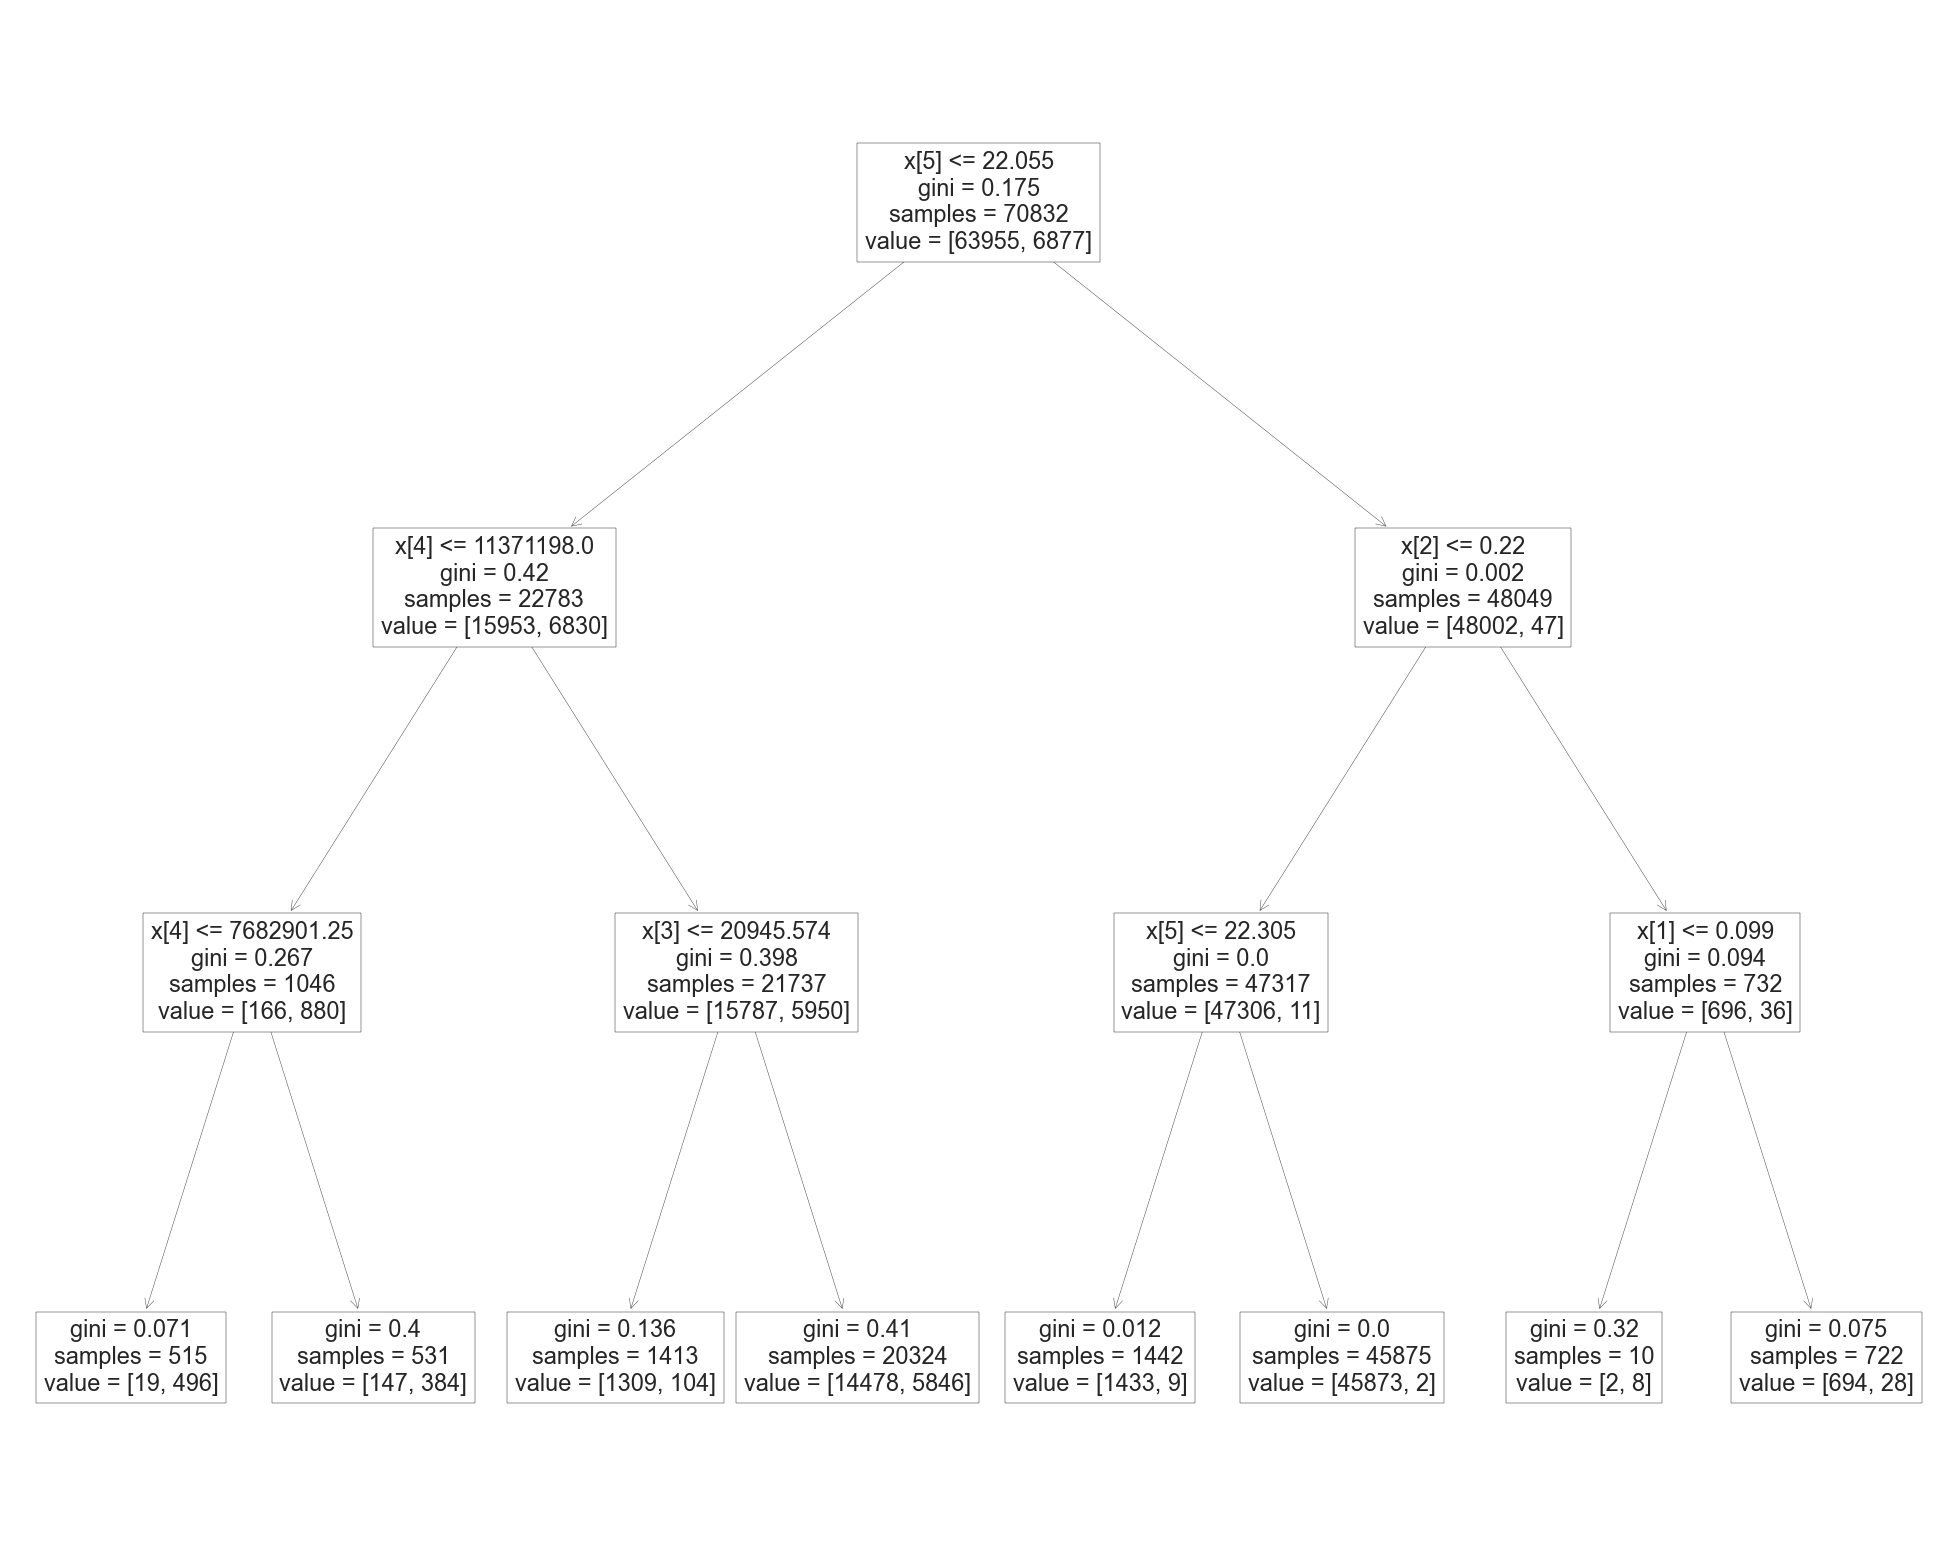

In [93]:
plt.figure(figsize=(25,20))
from sklearn import tree
tree.plot_tree(TreeCls.fit(X_train, y_train))

## pycaret:

In [94]:
setup(data=data,  target='hazardous', session_id=555, train_size=0.8, preprocess=True)

,Description,Value
0,Session id,555
1,Target,hazardous
2,Target type,Binary
3,Original data shape,"(88540, 7)"
4,Transformed data shape,"(88540, 7)"
5,Transformed train set shape,"(70832, 7)"
6,Transformed test set shape,"(17708, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [95]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [96]:
dt = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8905,0.6896,0.4404,0.4366,0.4385,0.3778,0.3778
1,0.8835,0.6657,0.3953,0.3994,0.3974,0.3329,0.3329
2,0.8813,0.6848,0.4410,0.3987,0.4188,0.3529,0.3534
3,0.8847,0.6795,0.4250,0.4090,0.4168,0.3529,0.3529
4,0.8868,0.6865,0.4381,0.4198,0.4288,0.3660,0.3661
5,0.8917,0.6981,0.4578,0.4443,0.4510,0.3909,0.3910
6,0.8871,0.6904,0.4462,0.4229,0.4342,0.3715,0.3717
7,0.8882,0.6942,0.4535,0.4286,0.4407,0.3786,0.3788
8,0.8873,0.6782,0.4186,0.4198,0.4192,0.3568,0.3568


In [97]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9102,0.9152,0.1105,0.7600,0.1929,0.1725,0.2679
1,0.9108,0.9105,0.1061,0.8111,0.1877,0.1690,0.2735
2,0.9126,0.9097,0.1179,0.8617,0.2074,0.1885,0.2997
3,0.9106,0.9091,0.1179,0.7500,0.2038,0.1822,0.2746
4,0.9123,0.9073,0.1310,0.7895,0.2247,0.2027,0.2993
5,0.9125,0.9145,0.1105,0.9048,0.1969,0.1795,0.2988
6,0.9140,0.9045,0.1323,0.8835,0.2301,0.2101,0.3226
7,0.9132,0.9100,0.1410,0.8017,0.2398,0.2171,0.3136
8,0.9159,0.9126,0.1424,0.9423,0.2475,0.2278,0.3484


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [98]:
compare_models(budget_time = 7) # за  7 минут

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9166,0.9293,0.3385,0.6323,0.4406,0.4000,0.4231,9.6750
et,Extra Trees Classifier,0.9151,0.9269,0.3250,0.6195,0.4260,0.3850,0.4086,3.1700
catboost,CatBoost Classifier,0.9144,0.9217,0.2296,0.6743,0.3422,0.3081,0.3602,19.8980
lightgbm,Light Gradient Boosting Machine,0.9140,0.9222,0.1822,0.7293,0.2913,0.2627,0.3364,0.6740
xgboost,Extreme Gradient Boosting,0.9139,0.9202,0.2411,0.6535,0.3520,0.3162,0.3620,0.6250
gbc,Gradient Boosting Classifier,0.9130,0.9186,0.1416,0.7927,0.2401,0.2171,0.3118,14.7340
ada,Ada Boost Classifier,0.9124,0.9122,0.1547,0.7348,0.2550,0.2290,0.3105,3.2200
lr,Logistic Regression,0.9029,0.4694,0.0000,0.0000,0.0000,0.0000,0.0000,0.2210
ridge,Ridge Classifier,0.9029,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0820
nb,Naive Bayes,0.8971,0.6725,0.0374,0.2776,0.0658,0.0438,0.0701,0.0800


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=555, verbose=0, warm_start=False)

## Ансамбли:

In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [100]:
BC = BaggingClassifier()
BC.fit(X_train, y_train)
y_pred_BagC = BC.predict(X_test)

In [101]:
Grad = GradientBoostingClassifier()
Grad.fit(X_train, y_train)
y_pred_GradC = Grad.predict(X_test)

In [102]:
estimators = [
     ('rf', RandomForestClassifier()),
     ('svr', LinearSVC())
]
Stack = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier(n_neighbors=5)) # rf svr knn
Stack.fit(X_train, y_train)
y_pred_StackC = Stack.predict(X_test)

In [103]:
with open("Bagging.pickle", "wb") as file1:
    pickle.dump(BC, file1)

In [104]:
with open("Gradient.pickle", "wb") as file2:
    pickle.dump(Grad, file2)

In [105]:
with open("Stacking.pickle", "wb") as file3:
    pickle.dump(Stack, file3)

In [106]:
print('Bag  Accuracy = {}'.format(accuracy_score(y_test, y_pred_BagC)))
print('Grad Accuracy = {}'.format(accuracy_score(y_test, y_pred_GradC)))
print('Stack Accuracy = {}'.format(accuracy_score(y_test, y_pred_StackC)))

Bag  Accuracy = 0.9076123785859499
Grad Accuracy = 0.911847752428281
Stack Accuracy = 0.902247571718997


## catboost, xgboost, lightgbm

In [107]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=2,learning_rate=0.5,depth=7)

model.fit(X_train, y_train)

y_pred_catC = model.predict(X_test)

print(classification_report(y_test, y_pred_catC))
confusion_matrix(y_test, y_pred_catC)

0:	learn: 0.4096281	total: 33.8ms	remaining: 33.8ms
1:	learn: 0.3043868	total: 60.9ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15989
           1       0.74      0.13      0.22      1719

    accuracy                           0.91     17708
   macro avg       0.83      0.56      0.59     17708
weighted avg       0.90      0.91      0.88     17708



array([[15913,    76],
       [ 1498,   221]], dtype=int64)

In [108]:
print(classification_report(y_test, y_pred_catC))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15989
           1       0.74      0.13      0.22      1719

    accuracy                           0.91     17708
   macro avg       0.83      0.56      0.59     17708
weighted avg       0.90      0.91      0.88     17708



In [109]:
from xgboost import XGBClassifier


XGB_classifier = XGBClassifier(eta=0.1, max_depth=6)
XGB_classifier.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_xgbC = XGB_classifier.predict(X_test)
confusion_matrix(y_test, y_pred_xgbC )

array([[15892,    97],
       [ 1451,   268]], dtype=int64)

In [110]:
print(classification_report(y_test, y_pred_xgbC))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15989
           1       0.73      0.16      0.26      1719

    accuracy                           0.91     17708
   macro avg       0.83      0.57      0.61     17708
weighted avg       0.90      0.91      0.89     17708



In [111]:
from lightgbm import LGBMClassifier

lbm = LGBMClassifier(force_row_wise=True)
lbm.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_lbm = lbm.predict(X_test)
confusion_matrix(y_test, y_pred_lbm )

[LightGBM] [Info] Number of positive: 6877, number of negative: 63955
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 70832, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097089 -> initscore=-2.229997
[LightGBM] [Info] Start training from score -2.229997


array([[15877,   112],
       [ 1403,   316]], dtype=int64)

In [112]:
print(classification_report(y_test, y_pred_lbm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15989
           1       0.74      0.18      0.29      1719

    accuracy                           0.91     17708
   macro avg       0.83      0.59      0.62     17708
weighted avg       0.90      0.91      0.89     17708



## Перейдём к дереву регрессий

In [113]:
data=pd.read_csv('energy_task.csv')

Предобработаем :

In [114]:
data=data.dropna()

In [115]:
data=data.drop_duplicates()
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [116]:
data=pd.get_dummies(data)

In [117]:
outlier = data[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9',
                'T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
outlier
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)

IQR=Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data=data_filtered


In [118]:
data.to_csv('regres.csv')

In [119]:
yreg = data["Appliances"]
Xreg = data.drop(["Appliances"], axis=1)

In [120]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg,random_state=999, test_size=0.2)

In [121]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth': np.arange(1, 10, 1)}

reg_optimal = RandomizedSearchCV(DecisionTreeRegressor(), parameters).fit(Xreg_train, yreg_train)
reg_optimal.best_params_

{'max_depth': 9}

In [122]:
reg = DecisionTreeRegressor(max_depth=reg_optimal.best_params_['max_depth'])
reg.fit(Xreg_train, yreg_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [123]:
print('Training set score: {:.4f}'.format(reg.score(Xreg_train, yreg_train)))
print('Test set score: {:.4f}'.format(reg.score(Xreg_test, yreg_test)))

Training set score: 0.6383
Test set score: 0.3800


как видем,разница значительна, значит модель переобучилось, попробую поменть лубину для улучеия ситуации.

In [124]:
reg = DecisionTreeRegressor(max_depth = 7)
reg.fit(Xreg_train, yreg_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [125]:
print('Training set score: {:.4f}'.format(reg.score(Xreg_train, yreg_train)))
print('Test set score: {:.4f}'.format(reg.score(Xreg_test, yreg_test)))

Training set score: 0.4819
Test set score: 0.3647


Изминение лубины не дало нужных рзультатов.попробую поэксперементировать с другими гиперпораметрами 

In [126]:
reg = DecisionTreeRegressor(criterion = 'poisson',splitter = 'best',max_depth = 9)
reg.fit(Xreg_train, yreg_train)
print('Training set score: {:.4f}'.format(reg.score(Xreg_train, yreg_train)))
print('Test set score: {:.4f}'.format(reg.score(Xreg_test, yreg_test)))

Training set score: 0.6730
Test set score: 0.4358


Добиться значительного улучшения ситуации не удаось, разве что criterion = 'poisson' дало не больой прирост точности.

In [127]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_12 <= 45.67
|   |--- feature_12 <= 3.25
|   |   |--- feature_15 <= 23.58
|   |   |   |--- feature_3 <= 21.86
|   |   |   |   |--- feature_5 <= 22.95
|   |   |   |   |   |--- feature_16 <= 38.21
|   |   |   |   |   |   |--- feature_7 <= 20.94
|   |   |   |   |   |   |   |--- feature_2 <= 34.36
|   |   |   |   |   |   |   |   |--- feature_18 <= 30.68
|   |   |   |   |   |   |   |   |   |--- value: [140.00]
|   |   |   |   |   |   |   |   |--- feature_18 >  30.68
|   |   |   |   |   |   |   |   |   |--- value: [130.00]
|   |   |   |   |   |   |   |--- feature_2 >  34.36
|   |   |   |   |   |   |   |   |--- feature_6 <= 37.51
|   |   |   |   |   |   |   |   |   |--- value: [120.00]
|   |   |   |   |   |   |   |   |--- feature_6 >  37.51
|   |   |   |   |   |   |   |   |   |--- value: [130.00]
|   |   |   |   |   |   |--- feature_7 >  20.94
|   |   |   |   |   |   |   |--- feature_9 <= 20.34
|   |   |   |   |   |   |   |   |--- feature_12 <= 1.22
|   |   |   |   |   |   |   |  

[Text(0.45575030438311687, 0.95, 'x[12] <= 45.671\npoisson = 4.686\nsamples = 7904\nvalue = 62.184'),
 Text(0.22242796266233766, 0.85, 'x[12] <= 3.245\npoisson = 4.907\nsamples = 3218\nvalue = 70.786'),
 Text(0.1078023538961039, 0.75, 'x[15] <= 23.583\npoisson = 5.108\nsamples = 495\nvalue = 85.414'),
 Text(0.04352678571428571, 0.65, 'x[3] <= 21.857\npoisson = 4.523\nsamples = 279\nvalue = 73.548'),
 Text(0.021915584415584416, 0.55, 'x[5] <= 22.945\npoisson = 2.587\nsamples = 34\nvalue = 104.706'),
 Text(0.01461038961038961, 0.45, 'x[16] <= 38.212\npoisson = 0.969\nsamples = 21\nvalue = 119.524'),
 Text(0.012987012987012988, 0.35, 'x[7] <= 20.945\npoisson = 0.52\nsamples = 20\nvalue = 117.0'),
 Text(0.006493506493506494, 0.25, 'x[2] <= 34.363\npoisson = 0.184\nsamples = 9\nvalue = 124.444'),
 Text(0.003246753246753247, 0.15, 'x[18] <= 30.68\npoisson = 0.093\nsamples = 2\nvalue = 135.0'),
 Text(0.0016233766233766235, 0.05, 'poisson = 0.0\nsamples = 1\nvalue = 140.0'),
 Text(0.0048701298

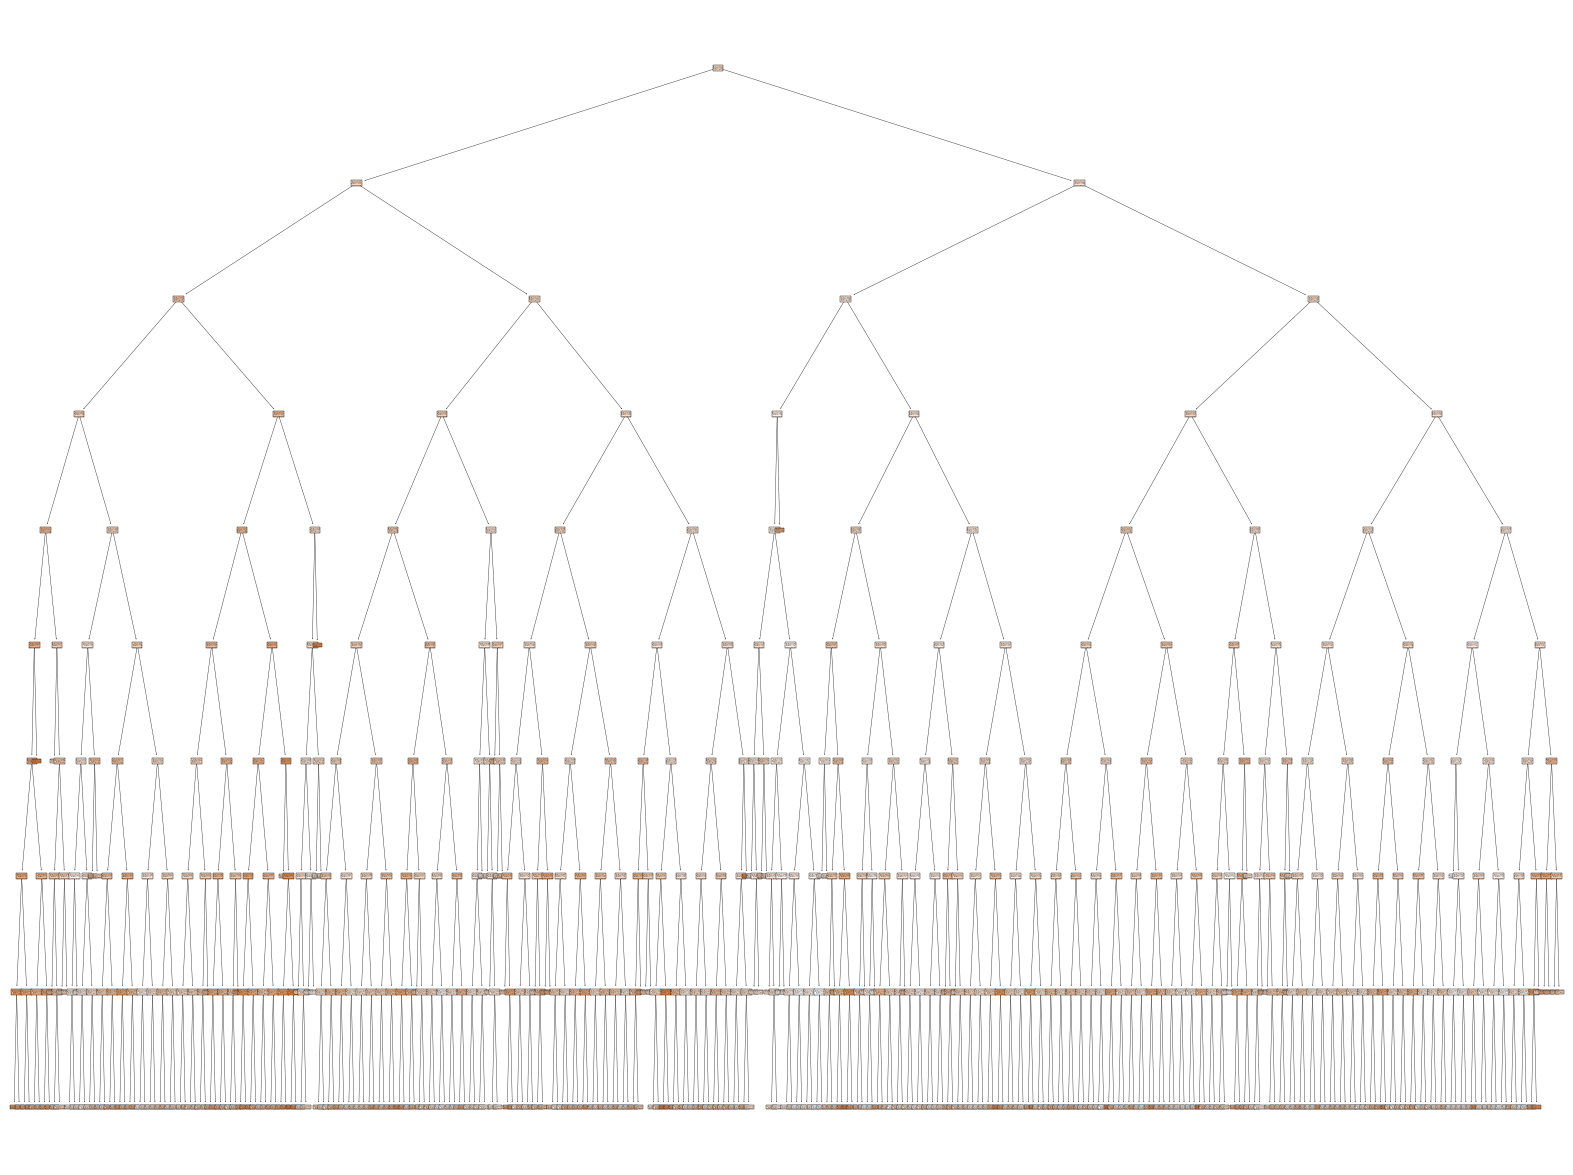

In [128]:
fig = plt.figure(figsize=(20,15))
DT_plot =tree.plot_tree(reg, filled=True)
DT_plot

In [129]:
setup(data=data,  target='Appliances', session_id=555, train_size=0.8, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Appliances
2,Target type,Multiclass
3,Target mapping,"10: 0, 20: 1, 30: 2, 40: 3, 50: 4, 60: 5, 70: 6, 80: 7, 90: 8, 100: 9, 110: 10, 120: 11, 130: 12, 140: 13, 150: 14, 160: 15, 170: 16"
4,Original data shape,"(9880, 26)"
5,Transformed data shape,"(9880, 26)"
6,Transformed train set shape,"(7904, 26)"
7,Transformed test set shape,"(1976, 26)"
8,Numeric features,25
9,Preprocess,True


In [130]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [131]:
dt_reg = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3072,0.5859,0.3072,0.3033,0.3048,0.1702,0.1703
1,0.3274,0.5986,0.3274,0.3255,0.3258,0.1954,0.1955
2,0.3363,0.0000,0.3363,0.3402,0.3373,0.2123,0.2126
3,0.3262,0.0000,0.3262,0.3309,0.3267,0.1919,0.1920
4,0.3051,0.0000,0.3051,0.2994,0.3016,0.1636,0.1637
5,0.3114,0.0000,0.3114,0.3061,0.3067,0.1700,0.1703
6,0.3063,0.0000,0.3063,0.3067,0.3058,0.1709,0.1710
7,0.3101,0.0000,0.3101,0.3116,0.3103,0.1743,0.1744
8,0.3139,0.0000,0.3139,0.3109,0.3120,0.1774,0.1775


In [132]:
tuned_dt_reg = tune_model(dt_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3097,0.6772,0.3097,0.2729,0.2783,0.1347,0.1384
1,0.3375,0.6992,0.3375,0.3087,0.3125,0.1760,0.1797
2,0.3401,0.0000,0.3401,0.3146,0.3123,0.1750,0.1803
3,0.3047,0.0000,0.3047,0.2911,0.2861,0.1288,0.1325
4,0.3544,0.0000,0.3544,0.3219,0.3236,0.1906,0.1958
5,0.3139,0.0000,0.3139,0.2751,0.2799,0.1332,0.1381
6,0.3532,0.0000,0.3532,0.3152,0.3200,0.1848,0.1903
7,0.3203,0.0000,0.3203,0.2842,0.2867,0.1436,0.1486
8,0.3354,0.0000,0.3354,0.3036,0.3076,0.1710,0.1744


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [133]:
compare_models(budget_time = 7)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.3567,0.2224,0.3567,0.3491,0.3509,0.2212,0.2216,3.9050
gbc,Gradient Boosting Classifier,0.3400,0.2154,0.3400,0.3195,0.3010,0.1546,0.1641,55.9790
knn,K Neighbors Classifier,0.3276,0.2086,0.3276,0.3145,0.3149,0.1736,0.1751,0.1550
dt,Decision Tree Classifier,0.3193,0.1797,0.3193,0.3188,0.3180,0.1849,0.1850,0.2350
ridge,Ridge Classifier,0.3181,0.0000,0.3181,0.2234,0.2305,0.0825,0.0985,0.0400
lr,Logistic Regression,0.3125,0.2084,0.3125,0.2441,0.2407,0.0886,0.1007,2.9840
ada,Ada Boost Classifier,0.2979,0.1648,0.2979,0.1484,0.1773,0.0397,0.0629,0.9080
svm,SVM - Linear Kernel,0.1756,0.0000,0.1756,0.1214,0.1116,0.0374,0.0520,0.8990
nb,Naive Bayes,0.1699,0.1871,0.1699,0.2315,0.1676,0.0679,0.0713,0.0480
qda,Quadratic Discriminant Analysis,0.0223,0.0000,0.0223,0.0005,0.0010,0.0000,0.0000,0.0530


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=555, verbose=0, warm_start=False)

## Ансамбли:

In [134]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [135]:
BC = BaggingRegressor()
BC.fit(Xreg_train, yreg_train)
y_pred_Bag = BC.predict(Xreg_test)

In [136]:
Grad = GradientBoostingRegressor()
Grad.fit(Xreg_train, yreg_train)
y_pred_Grad = Grad.predict(Xreg_test)

In [137]:
estimators = [('lr', Ridge()),
             ('svr', LinearSVR())
]

Stack = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor()) # lr svr rfr
Stack.fit(Xreg_train, yreg_train)
y_pred_Stack = Stack.predict(Xreg_test)

In [138]:
print('Bag  Accuracy = {}'.format(BC.score(Xreg_test, yreg_test)))
print('Grad Accuracy = {}'.format(Grad.score(Xreg_test, yreg_test)))
print('Stack Accuracy = {}'.format(Stack.score(Xreg_test, yreg_test)))

Bag  Accuracy = 0.607632616697948
Grad Accuracy = 0.44316644571879293
Stack Accuracy = 0.1467496967183709


## catboost, xgboost, lightgbm

In [139]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=2,
                          learning_rate=0.5,
                          depth=10)

cat.fit(Xreg_train, yreg_train)

y_pred_catC = cat.predict(Xreg_test)

0:	learn: 22.1673439	total: 162ms	remaining: 162ms
1:	learn: 20.5375770	total: 315ms	remaining: 0us


In [140]:
from xgboost import XGBRegressor

XGB_regressor = XGBRegressor(eta=0.1, max_depth=6)
XGB_regressor.fit(Xreg_train, yreg_train)

y_pred_xgbC = XGB_regressor.predict(Xreg_test)

In [141]:
from lightgbm import LGBMRegressor

lbm = LGBMRegressor(force_row_wise=True)
lbm.fit(Xreg_train.to_numpy(), yreg_train.to_numpy())

y_pred_lbmC = lbm.predict(Xreg_test)

[LightGBM] [Info] Total Bins 5758
[LightGBM] [Info] Number of data points in the train set: 7904, number of used features: 24
[LightGBM] [Info] Start training from score 62.183704


In [142]:
print(cat.score(Xreg_test, yreg_test))
print(XGB_regressor.score(Xreg_test, yreg_test))
print(lbm.score(Xreg_test, yreg_test))

0.3066185407218176
0.5970934050150969
0.59589539762072


# CART

In [143]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class CART:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def _calculate_gini(self, y):
        classes = np.unique(y)
        gini = 0.0
        for cls in classes:
            p_cls = np.sum(y == cls) / len(y)
            gini += p_cls * (1 - p_cls)
        return gini

    def _split_dataset(self, X, y, feature_index, threshold):
        left_indices = X[:, feature_index] < threshold
        right_indices = ~left_indices
        left_X, left_y = X[left_indices], y[left_indices]
        right_X, right_y = X[right_indices], y[right_indices]
        return left_X, left_y, right_X, right_y

    def _find_best_split(self, X, y):
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_X, left_y, right_X, right_y = self._split_dataset(X, y, feature_index, threshold)
                
                if len(left_y) < self.min_samples_split or len(right_y) < self.min_samples_split:
                    continue

                gini_left = self._calculate_gini(left_y)
                gini_right = self._calculate_gini(right_y)
                weighted_gini = (len(left_y) * gini_left + len(right_y) * gini_right) / len(y)

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return Node(value=np.argmax(np.bincount(y)))

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return Node(value=np.argmax(np.bincount(y)))

        left_X, left_y, right_X, right_y = self._split_dataset(X, y, best_feature, best_threshold)

        left_node = self._build_tree(left_X, left_y, depth + 1)
        right_node = self._build_tree(right_X, right_y, depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node)

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        self.tree = self._build_tree(X, y, depth=0)

    def _predict_one(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] < node.threshold:
            return self._predict_one(x, node.left)
        else:
            return self._predict_one(x, node.right)

    def predict(self, X):
        predictions = []
        for x in X:
            prediction = self._predict_one(x, self.tree)
            predictions.append(prediction)
        return np.array(predictions)


In [144]:
data=pd.read_csv('classification.csv')
Xc = np.array(data.drop(["hazardous"], axis=1))[:1000]
yc= np.array(data['hazardous'])[:1000]
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2)

In [145]:
cart = CART(max_depth=5, min_samples_split=2)
cart.fit(Xc_train, yc_train)

y_pred_cart = cart.predict(Xc_test)

In [146]:
print(classification_report(yc_test, y_pred_cart))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       178
           1       0.33      0.09      0.14        22

    accuracy                           0.88       200
   macro avg       0.62      0.53      0.54       200
weighted avg       0.83      0.88      0.85       200



In [147]:
data=pd.read_csv('regres.csv')
Xc = np.array(data.drop(["Appliances"], axis=1))[:1000]
yc= np.array(data['Appliances'])[:1000]
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2)

In [148]:
from sklearn.metrics import r2_score
from numpy import sqrt 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

def R2(y_test, y_pred):
  return  1 - MSE(y_test, y_pred)/ ((y_test- y_test.mean())**2).mean()
def MSE(y_test, y_pred):
    return  ((y_test-y_pred)**2).mean()

cart = CART(max_depth=12, min_samples_split=2)
cart.fit(Xc_train, yc_train)

y_pred_cart = cart.predict(Xc_test)

print(f'MAE: {mean_absolute_error(yc_test, y_pred_cart)}')
print(f'MSE: {mean_squared_error(yc_test, y_pred_cart)}')
print(f'RMSE: {sqrt(mean_squared_error(yc_test, y_pred_cart))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(yc_test, y_pred_cart))}')
print(f'R^2: {R2(yc_test, y_pred_cart)}')

MAE: 10.75
MSE: 328.5
RMSE: 18.12456896039186
MAPE: 0.5217898941525158
R^2: 0.27096799249884884
